# 6.3 Nonlinear equations

We know many equations in physics are nonlinear. That are in general harder to solve. So, we will study some techniques for solving nonlinear equations.

### 6.3.1 The relaxation method

We have the single variable nonlinear equation, such as
\begin{equation}x=2-e^{-x}\end{equation}


We want to solve it, but there is no known analityc method for solving it. Then, we turn to computational methods.
We just iterate the equation. We guess an initial value, for example $x=1$, and plug it in on the right-hand side of our equation, and we get
\begin{equation} x'=2-e^{-1}\simeq 1.632.\end{equation}



We get a new value $x'$ on the left-hand side. Then, we repeat the process, taking this value and feeding it in on the right again to get
\begin{equation} x''=2-e^{-1.632}\simeq 1.804,\end{equation}
and so forth. Finally if we are lucky the value will converge to a fixed point of the equation.\
The program to perform the calculation is:

In [2]:
import math
x=1.0
for i in range (10):
    x=2-math.exp(-x)
    print(x)


1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121


In [6]:
for i in range (100):
    x=2-math.exp(-x)
print(x)

1.8414056604369606


In [7]:
x=2-math.exp(-x)

In [8]:
print(x)

1.8414056604369606


Then, this is necessarily a solution to the original equation.\
This method is called the $\textit{relaxation method}$.

The method does have its problems. First, the equation needs to be in the simple form $x=f(x)$, with $f(x)$ a known fuction.
However, it can be rearranged in that form. If you have the equation $logx + x^2 -1$, for instance, you can take the exponetial of both sides and rearrange to get $x=e^{1-x^2}$.

Second, an equation may have more than one solution. But, we can find it by choosing a starting value near to the solution.
There are, however, some solutions that you cannot find it no matters what satarting value you choose.

For example, the equation $x=e^{1-x^2}$, with solution $x=1$. But if we try to find the solution by the relaxation method, with the starting value $x=1/2$ we get

In [3]:
x=0.5
for i in range (10):
    x=math.exp(1-x**2)
    print(x)

2.117000016612675
0.030755419069985038
2.715711832754083
0.0017034651847384463
2.71827394057758
0.001679913095081425
2.7182741571849562
0.0016799111168229455
2.7182741572030236
0.0016799111166579386


We never get the solution in this case, no matter how long we wait.

An useful trick is to try another way to arranging the equation
    \begin{equation} x=\sqrt{1-\log{x}}\end{equation}

And, if we now apply the relaxation method, with the starting value $x=1/2$

In [4]:
x=0.5
for i in range (10):
    x=math.pow(1-math.log(x),0.5)
    print(x)

1.3012098910475378
0.8583154914892762
1.0736775779454883
0.9637999044091371
1.0182689104343374
0.990906635925747
1.004557096969838
0.997724037576543
1.0011386299421705
0.9994308469350205


In [7]:
for i in range (100):
    x=math.pow(1-math.log(x),0.5)
print(x)

1.0


Assume we have  an equation of the form $x=f(x)$ that has a solution $x=x^*$ and we can perform an Taylor expansion, the value $x'$ after an iteration of the method is given  in terms  of the previous  value x by
\begin{equation} x'=f(x)=f(x^*)+(x-x^*)f'(x^*)+...\end{equation} 
But, $x^*$ is a solution, $\textit{i.e.}$  $x^*=f(x^*)$. Then,
\begin{equation} x'-x^*=(x-x^*)f'(x^*),\end{equation}


This means that the distance $x'-x$ to the true solution gets multiplied on each iteration by a factor of $f'(x^*)$.
Thus the relaxation  method  will converge to a solution at $x^*$ if and only if $|f'(x^*)|<1$. 
This explain why the method failed for $f(x)=e^{1-x^2}$, since $|f'(x^*)|_{x^*=1}=2$

If we find ourselves in a situation where $|f'(x^*)|>1$, $i.e.$ the relaxation method fails to converge for $x=f(x)$ it will
succeed for the equivalent form $x=f^{-1}(x)$

#### In summary, the relaxation method does not always work, but between the cases where it works first time, the ones where it can be made to work by inverting, and the ones where some other rearrangement turns out  by good luck to work, the method is useful for a wide range of problems.

### 6.3.2 Rate of convergence of the relaxation method

When the method converges, the distance to the solution gets smaller by a factor of $|f'(x)|$ on each iteration.
The distance decrease exponentially.
Let us define $\epsilon$ to be the error. That is $x^*=x+\epsilon$. Similarly let $\epsilon'$ be the error on the next estimate, so that $x^*=x'+\epsilon'$. Then,
\begin{equation} \epsilon'=\epsilon f'(x^*).\end{equation}
\begin{equation} x^*=x+\epsilon=x+\dfrac{\epsilon'}{f'(x^*)}\end{equation}
And rearranging for $\epsilon'$ using $x^*=x'+\epsilon'$
\begin{equation} \epsilon'=\dfrac{x-x'}{1-1/f'(x)}\end{equation}

When we do not know the full formula for $f(x)$. We can calculate the error  on the most recent estimate by
\begin{equation} \epsilon''=\dfrac{x'-x''}{1-1/f'(x)},\end{equation}
using the numerical derivative.

\begin{equation} \epsilon''=\dfrac{(x'-x'')^2}{2x'-x-x''},\end{equation}

AttributeError: module 'matplotlib.pyplot' has no attribute 'savefigure'

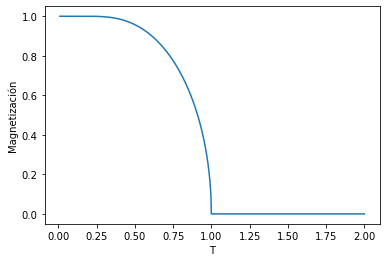

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Tmax=2.0
acc=1e-6

y=[]
T=np.linspace(0.01,Tmax,1000)

for t in T:
    m1=1.0
    err=1.0
    
    while err>acc:
        m1,m2=np.tanh(m1/t),m1
        err=abs((m1-m2)/(1-t*np.cosh(m2/t)**2))
    
    y.append(m1)

plt.plot(T,y)
plt.xlabel("T")
plt.ylabel("Magnetización")
plt.savefigure("Mag.jpg",dpi=300)
plt.show()